In [17]:
import statsmodels.nonparametric.smoothers_lowess as st
from pykalman import KalmanFilter as kalman
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
filename = 'sysinfo.csv'
cpu_data = pd.read_csv(filename, parse_dates= [4])

In [5]:
cpu_data['timestamp'] = cpu_data['timestamp'].apply(lambda time : time.timestamp())

In [14]:
loess_smoothed = st.lowess(cpu_data['temperature'], cpu_data['timestamp'], frac=0.05)

In [18]:
kalman_data = cpu_data[['temperature', 'cpu_percent', 'sys_load_1']]

In [19]:
initial_state = kalman_data.iloc[0]
observation_covariance = np.diag([.8, 0.02, 0.02]) ** 2 
transition_covariance = np.diag([1, 0.02, 0.02]) ** 2
transition = [[1.0, -1.0, 0.7], [0, 0.6, 0.03], [0, 1.3, 0.8]]

In [20]:
kalman_model = kalman(initial_state_mean = initial_state, 
                    initial_state_covariance = observation_covariance,
                    transition_covariance = transition_covariance, 
                    observation_covariance = observation_covariance)
kalman_smoothed, _ = kalman_model.smooth(kalman_data)

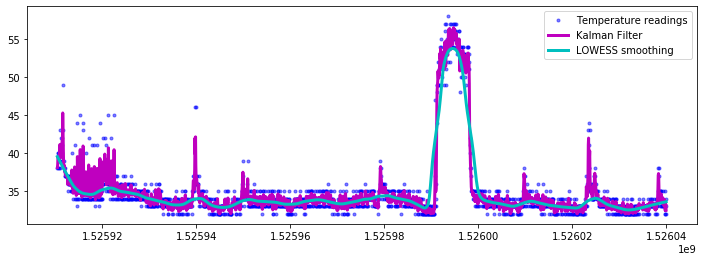

In [36]:
# Plot everything
plt.figure(figsize=(12, 4))
# All data
plt.plot(cpu_data['timestamp'], cpu_data['temperature'], 'b.', alpha=0.5)
# Kalman filter smoothed
plt.plot(cpu_data['timestamp'], kalman_smoothed[:, 0], 'm-', linewidth=3)
# LOWESS filter smoothed
plt.plot(cpu_data['timestamp'], loess_smoothed[:, 1], 'c-', linewidth=3)
# Add legend
plt.legend(["Temperature readings", "Kalman Filter", "LOWESS smoothing"])
# plt.show()
# Save as image
plt.savefig('cpu.svg')